# Regressão não linear

Vamos gerar nosso dataset com 2 variáveis independentes (X e Z)

In [15]:
set.seed(42)
X = seq(from = 1.5, to = 3.0, length.out = 100)
set.seed(42)
Y <- unlist(lapply(X, function(x) {x^4 + runif(1)*6.5}))
set.seed(42)
Z <- unlist(lapply(X*Y, function(x) {x + runif(1)*3.2}))

In [18]:
#install.packages('scatterplot3d')
library(scatterplot3d)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


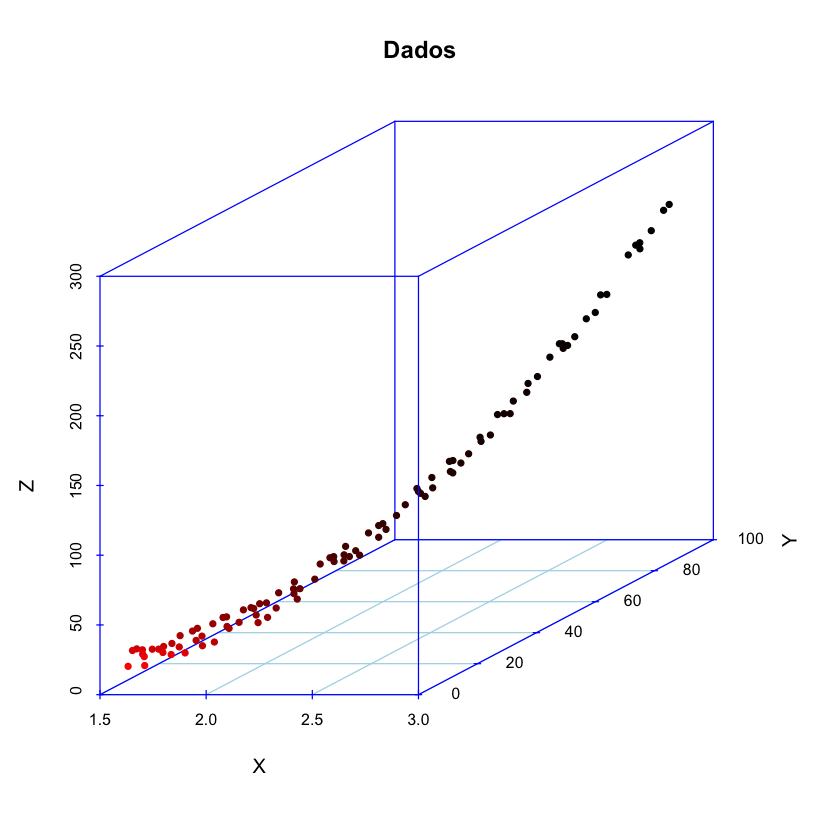

In [19]:
scatterplot3d(X, Y, Z, highlight.3d=TRUE, col.axis="blue",
      col.grid="lightblue", main="Dados", pch=20)


## Decision tree com dados bidimensionais
Vamos reduzir nosso exemplo, para demonstrar o uso de árvore de decisão.

**Train/Test split**
Precisamos dividir nossos dados em dados de treino e de teste: 

In [37]:
set.seed(42) 
indices_x <- sample.int(n = length(X), size = floor(.75*length(X)), replace = FALSE)
x_treino <- X[indices_x]
x_teste  <- X[-indices_x]
set.seed(42) 
indices_y <- sample.int(n = length(Y), size = floor(.75*length(Y)), replace = FALSE)
y_treino <- Y[indices_y]
y_teste  <- Y[-indices_y]

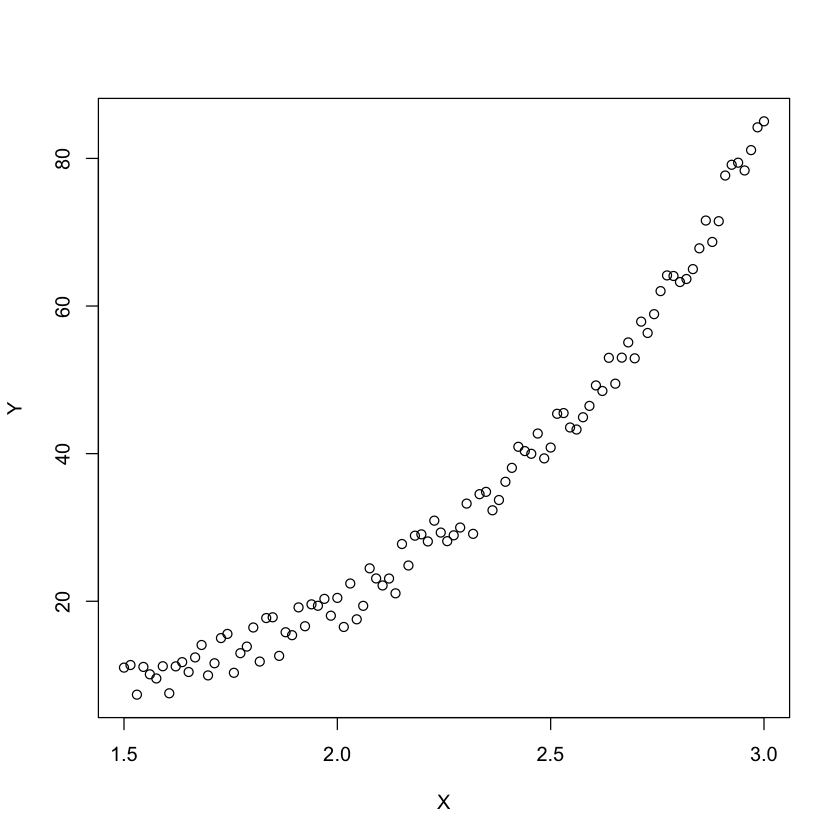

In [36]:
plot(x_treino,y_treino)

In [45]:
library(rpart)

In [82]:
df_treino <- data.frame(x = x_treino, y = y_treino)
y <- df_treino$y
x <- df_treino$x
modelo <- rpart(y ~ x, method = "anova")
summary(modelo)

Call:
rpart(formula = y ~ x, method = "anova")
  n= 75 

          CP nsplit  rel error     xerror       xstd
1 0.77190906      0 1.00000000 1.04215943 0.12601894
2 0.10351770      1 0.22809094 0.25218900 0.03789769
3 0.06151299      2 0.12457324 0.13997218 0.01921155
4 0.01000000      3 0.06306025 0.08273353 0.01194120

Variable importance
  x 
100 

Node number 1: 75 observations,    complexity param=0.7719091
  mean=35.36039, MSE=462.1066 
  left son=2 (44 obs) right son=3 (31 obs)
  Primary splits:
      x < 2.416667 to the left,  improve=0.7719091, (0 missing)

Node number 2: 44 observations,    complexity param=0.06151299
  mean=19.5075, MSE=66.62867 
  left son=4 (29 obs) right son=5 (15 obs)
  Primary splits:
      x < 2.068182 to the left,  improve=0.7272044, (0 missing)

Node number 3: 31 observations,    complexity param=0.1035177
  mean=57.86128, MSE=160.4359 
  left son=6 (18 obs) right son=7 (13 obs)
  Primary splits:
      x < 2.75     to the left,  improve=0.7213645, (0

In [68]:
print(modelo)

n= 75 

node), split, n, deviance, yval
      * denotes terminal node

1) root 75 34658.0000 35.36039  
  2) df_treino$x< 2.416667 44  2931.6610 19.50750  
    4) df_treino$x< 2.068182 29   445.9290 14.50133 *
    5) df_treino$x>=2.068182 15   353.8155 29.18609 *
  3) df_treino$x>=2.416667 31  4973.5140 57.86128  
    6) df_treino$x< 2.75 18   659.8336 48.71881 *
    7) df_treino$x>=2.75 13   725.9638 70.52009 *



Regression tree:
rpart(formula = df_treino$y ~ df_treino$x, method = "anova")

Variables actually used in tree construction:
[1] df_treino$x

Root node error: 34658/75 = 462.11

n= 75 

        CP nsplit rel error  xerror     xstd
1 0.771909      0   1.00000 1.03287 0.126546
2 0.103518      1   0.22809 0.24554 0.037148
3 0.061513      2   0.12457 0.14185 0.019953
4 0.010000      3   0.06306 0.08240 0.011290


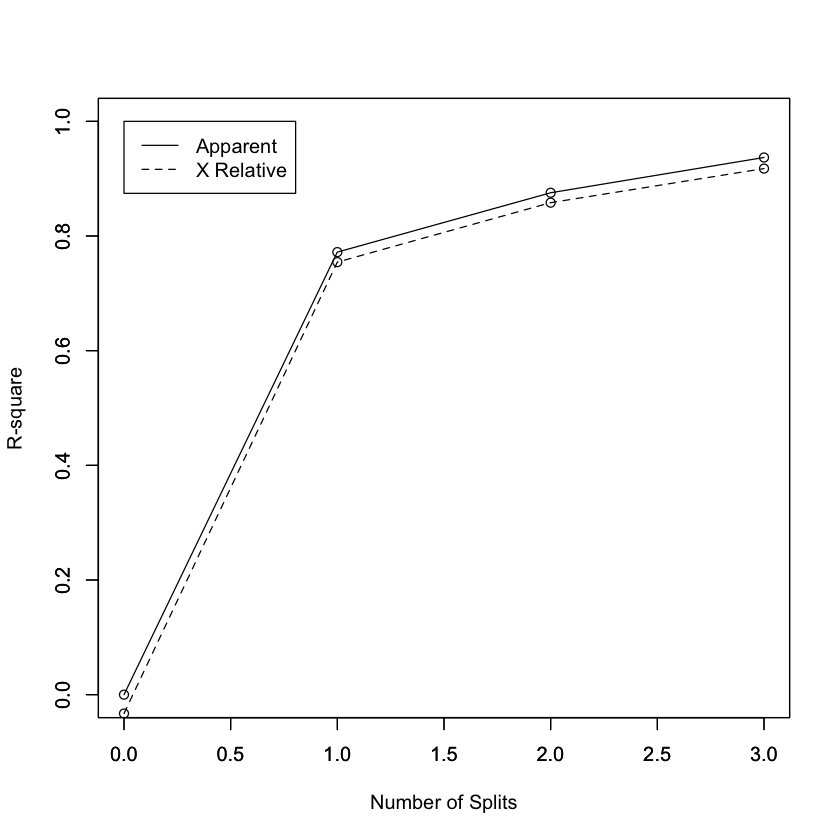

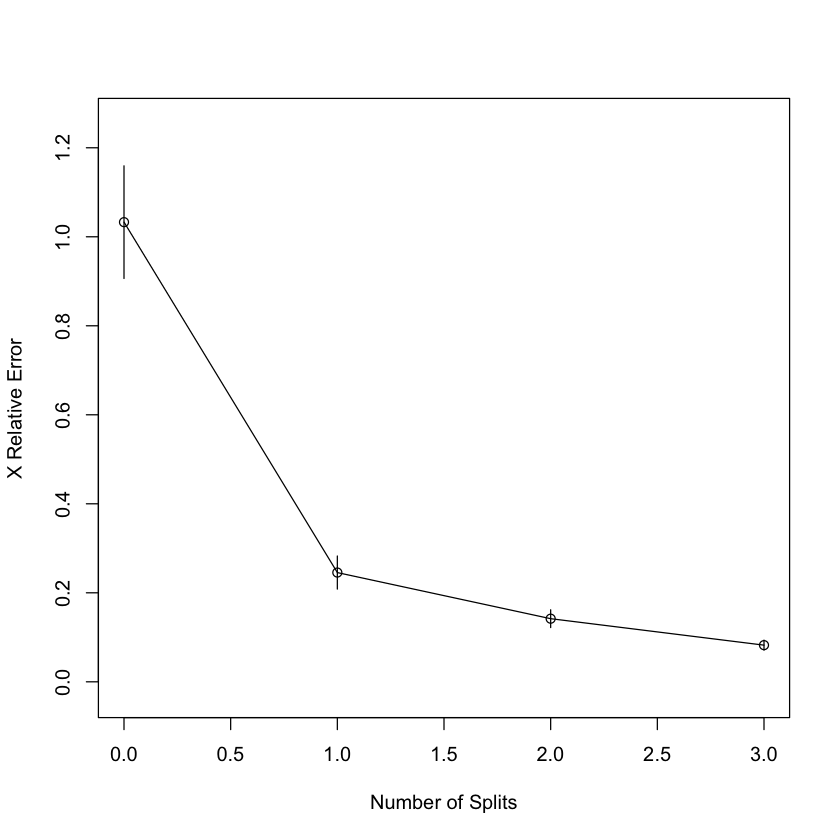

In [69]:
rsq.rpart(modelo)

In [70]:
printcp(modelo)


Regression tree:
rpart(formula = df_treino$y ~ df_treino$x, method = "anova")

Variables actually used in tree construction:
[1] df_treino$x

Root node error: 34658/75 = 462.11

n= 75 

        CP nsplit rel error  xerror     xstd
1 0.771909      0   1.00000 1.03287 0.126546
2 0.103518      1   0.22809 0.24554 0.037148
3 0.061513      2   0.12457 0.14185 0.019953
4 0.010000      3   0.06306 0.08240 0.011290


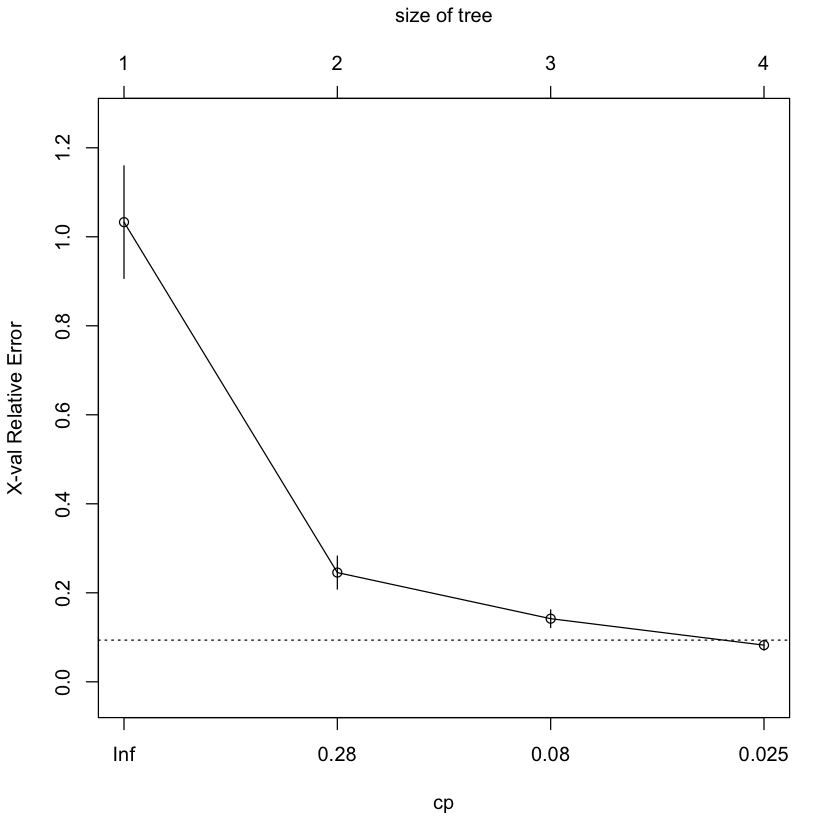

In [71]:
plotcp(modelo)

## Plotando a árvore gerada

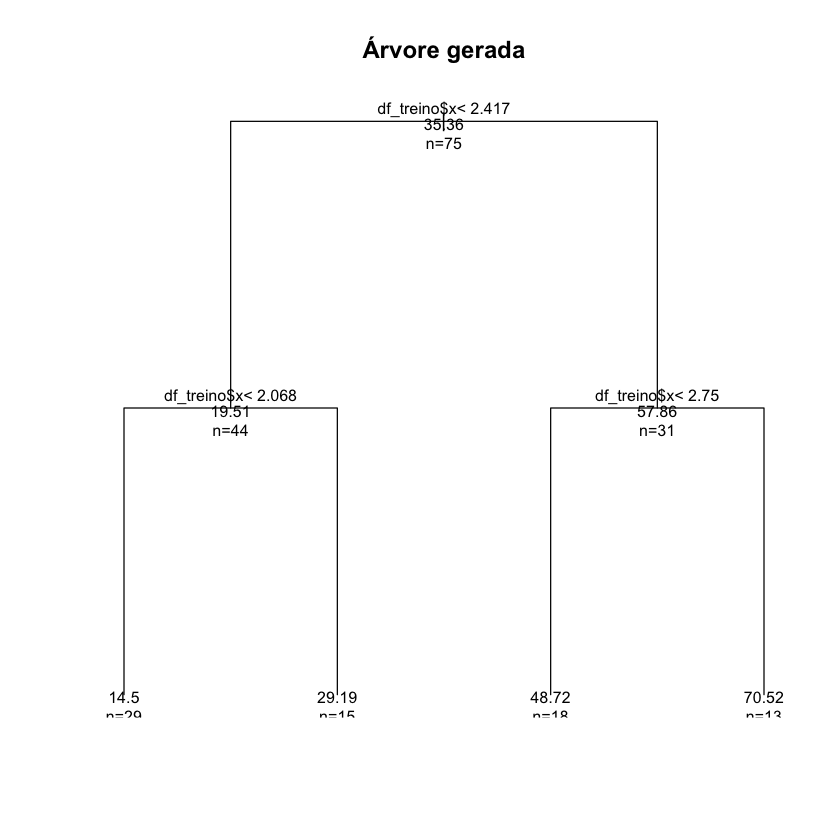

In [72]:
plot(modelo, uniform=TRUE, 
  	main="Árvore gerada")
text(modelo, use.n=TRUE, all=TRUE, cex=.8)

## Vamos podar a árvore para o erro mínimo

In [73]:
min.xerror <- modelo$cptable[which.min(modelo$cptable[,"xerror"]),"CP"]
min.xerror

[1] 0.01

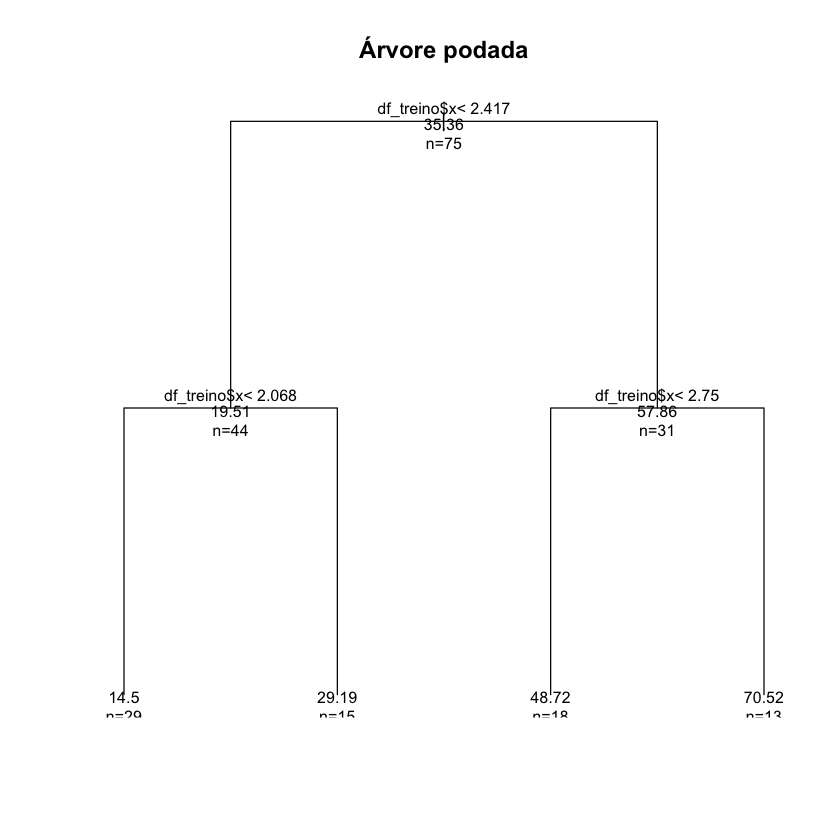

In [74]:
modelo_podado <- prune(modelo,cp = min.xerror) 
plot(modelo_podado, uniform=TRUE, 
  	main="Árvore podada")
text(modelo_podado, use.n=TRUE, all=TRUE, cex=.8)

Nossa árvore já está do tamanho correto, logo, não é necessário podar

## Fazendo predições e plotando

In [83]:
df_teste <- data.frame(x = x_teste, y = y_teste)
y <- df_teste$y
x <- df_teste$x
predicoes <- predict(modelo, newdata = df_teste)

In [85]:
predicoes

1        2        3        4        5        6        7        8 
14.50133 14.50133 14.50133 14.50133 14.50133 14.50133 14.50133 14.50133 
       9       10       11       12       13       14       15       16 
14.50133 29.18609 29.18609 29.18609 29.18609 29.18609 29.18609 29.18609 
      17       18       19       20       21       22       23       24 
29.18609 48.71881 48.71881 48.71881 48.71881 70.52009 70.52009 70.52009 
      25 
70.52009

In [65]:
str(x_teste)

 num [1:25] 1.55 1.62 1.67 1.71 1.73 ...


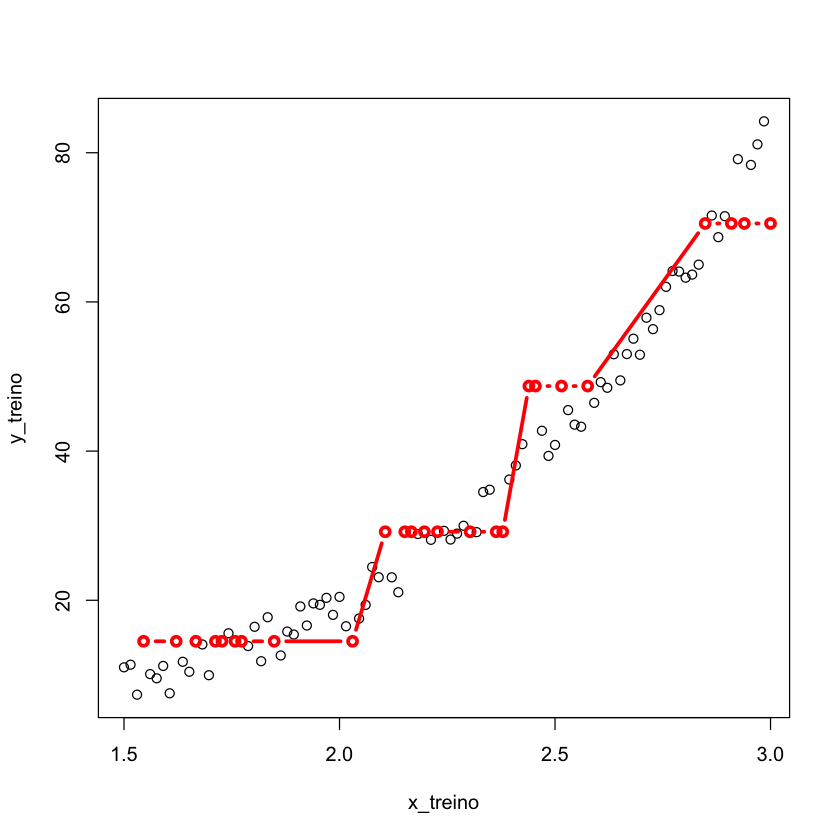

In [92]:
plot(x_treino,y_treino)
lines(x_teste,predicoes,col=2,lwd=3,type="b")

Como vemos, nossas predições, utilizando os dados de teste, estão seguindo a curva original da amostra.

## Decision tree com dados tridimensionais
Ok, agora vamos incluir a variável z...

In [93]:
set.seed(42) 
indices_x <- sample.int(n = length(X), size = floor(.75*length(X)), replace = FALSE)
x_treino <- X[indices_x]
x_teste  <- X[-indices_x]
set.seed(42) 
indices_y <- sample.int(n = length(Y), size = floor(.75*length(Y)), replace = FALSE)
y_treino <- Y[indices_y]
y_teste  <- Y[-indices_y]
set.seed(42) 
indices_z <- sample.int(n = length(Z), size = floor(.75*length(Z)), replace = FALSE)
z_treino <- Z[indices_z]
z_teste  <- Z[-indices_z]



In [94]:
df_treino <- data.frame(x = x_treino, y = y_treino, z = z_treino)
y <- df_treino$y
x <- df_treino$x
z <- df_treino$z
modelo <- rpart(y ~ x + z, method = "anova")
summary(modelo)

Call:
rpart(formula = y ~ x + z, method = "anova")
  n= 75 

          CP nsplit  rel error     xerror       xstd
1 0.77190906      0 1.00000000 1.02161810 0.12312619
2 0.10351770      1 0.22809094 0.24645438 0.03609954
3 0.06234255      2 0.12457324 0.15201905 0.02086695
4 0.01106977      3 0.06223069 0.07934378 0.01048420
5 0.01000000      4 0.05116092 0.07651502 0.01067575

Variable importance
 z  x 
50 50 

Node number 1: 75 observations,    complexity param=0.7719091
  mean=35.36039, MSE=462.1066 
  left son=2 (44 obs) right son=3 (31 obs)
  Primary splits:
      z < 96.14318 to the left,  improve=0.7719091, (0 missing)
      x < 2.416667 to the left,  improve=0.7719091, (0 missing)
  Surrogate splits:
      x < 2.416667 to the left,  agree=1, adj=1, (0 split)

Node number 2: 44 observations,    complexity param=0.06234255
  mean=19.5075, MSE=66.62867 
  left son=4 (30 obs) right son=5 (14 obs)
  Primary splits:
      z < 47.68907 to the left,  improve=0.7370114, (0 missing)
     

## Fazendo predições e plotando

In [95]:
df_teste <- data.frame(x = x_teste, y = y_teste, z = z_teste)
y <- df_teste$y
x <- df_teste$x
z <- df_teste$z
predicoes <- predict(modelo, newdata = df_teste)

In [96]:
predicoes

1        2        3        4        5        6        7        8 
10.89739 10.89739 10.89739 10.89739 18.06555 10.89739 10.89739 18.06555 
       9       10       11       12       13       14       15       16 
29.76553 29.76553 29.76553 29.76553 29.76553 29.76553 29.76553 29.76553 
      17       18       19       20       21       22       23       24 
29.76553 48.71881 48.71881 48.71881 48.71881 70.52009 70.52009 70.52009 
      25 
70.52009

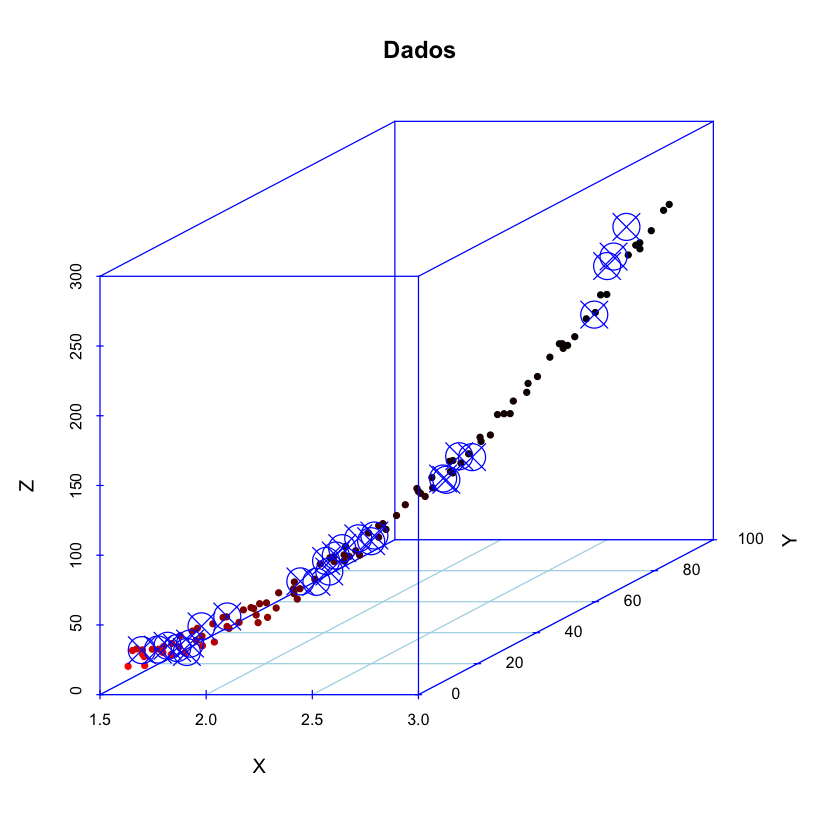

In [118]:
plot1 <- scatterplot3d(X, Y, Z, highlight.3d=TRUE, col.axis="blue",
      col.grid="lightblue", main="Dados", pch=20)
plot1$points3d(df_teste$x, predicoes, df_teste$z, col = 4, pch=13, cex=3)


Os pontos marcados com um alvo em azul, são nossas predições. Note que, no geral, acertamos bastante.